In [1]:
# Import packages to visualize the classifer
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import warnings

# Import packages to do the classifying
import numpy as np
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings("ignore")

In [2]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))

def custom_decision_regions(X, y, classifier, test_idx=None, resolution=0.01):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=cmap(idx),
                    marker=markers[idx], 
                    label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='k',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, 
                    label='test set')

#### Generate Data

Here we are generating some __non-linearly__ separable data that we will train our classifier on. 

There are two classes in our y vector:

XOR is a binary operation, it stands for "exclusive or", that is to say the resulting bit evaluates to one `if only exactly one of the bits is set`.

In [3]:
print(0 | 0)
print(0 | 1)
print(1 | 0)
print(1 | 1)

0
1
1
1


In [4]:
print(0 ^ 0)
print(0 ^ 1)
print(1 ^ 0)
print(1 ^ 1)

0
1
1
0


In [5]:
print(0 ^ 0)
print(0 ^ 1 ^ 1)
print(1 ^ 0 ^ 1)
print(1 ^ 1 ^ 0)

0
0
0
0


In [6]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
X_xor[:5]

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       [ 0.95008842, -0.15135721],
       [-0.10321885,  0.4105985 ]])

In [7]:
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor[:5]

array([False, False,  True,  True,  True])

In [8]:
y_xor = np.where(y_xor, 1, 0)
y_xor[:5]

array([0, 0, 1, 1, 1])

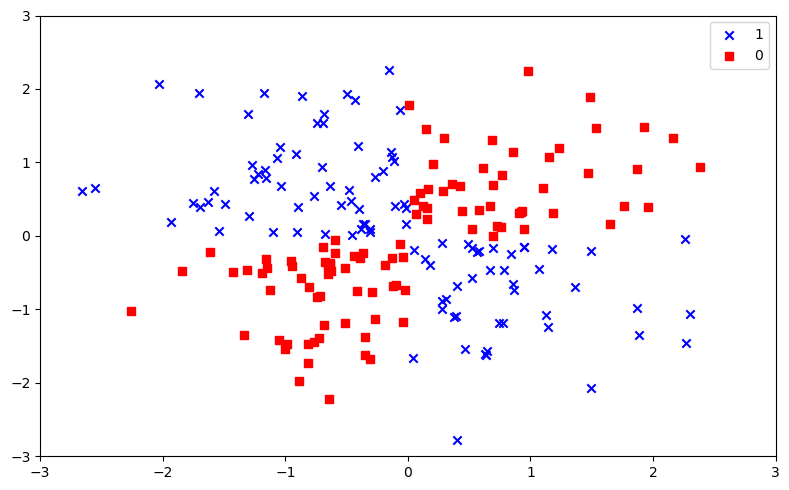

In [9]:
plt.figure(figsize=(8, 5))

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', 
            marker='x',
            label='1')

plt.scatter(X_xor[y_xor == 0, 0],
            X_xor[y_xor == 0, 1],
            c='r',
            marker='s',
            label='0')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()

#### Classify Using a Linear Kernel

The `most basic way` to use a SVC is with a `linear kernel`, which means the decision boundary is a __straight line (or hyperplane in higher dimensions)__. 

`Linear kernels are rarely used in practice`

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


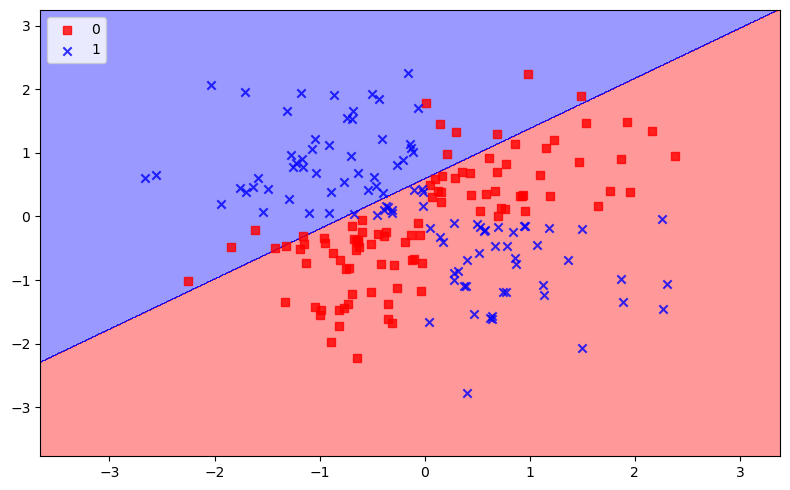

In [10]:
# Create a SVC classifier using a linear kernel
svm = SVC(kernel='linear', C=1, random_state=0)

# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plt.figure(figsize=(8, 5))

custom_decision_regions(X_xor, y_xor, classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()

 As can been seen below, it is not very good at classifying (which can be seen by all the blue X’s in the red region) because the data is not linear.

#### Classify Using a `RBF` Kernel
Radial Basis Function is a commonly used kernel in SVM:

$$ K(\mathbf {x} ,\mathbf {x’} )=\exp \left(-{\frac {||\mathbf {x} -\mathbf {x’} ||^{2}}{2\sigma ^{2}}}\right)$$

where $||\mathbf {x} -\mathbf {x’} ||^{2}$  is the squared Euclidean distance between two data points $\mathbf {x}$ and $ \mathbf {x’} $

#### 1. Gamma
gamma is a parameter of the RBF kernel and can be thought of as the ‘spread’ of the kernel and therefore the decision region. 

    When gamma is low, the ‘curve’ of the decision boundary is very low and thus the decision region is very broad. 

    When gamma is high, the ‘curve’ of the decision boundary is high, which creates islands of decision-boundaries around data points.
    
#### 2. C
C is a parameter of the SVC learner and is the `penalty` for misclassifying a data point. 

    When C is small, the classifier is okay with misclassified data points (high bias, low variance). 
    
    When C is large, the classifier is heavily penalized for misclassified data and therefore bends over backwards avoid any misclassified data points (low bias, high variance).
    

#### Gamma = 0.01
In the case of our SVC classifier and data, when using a low gamma like 0.01, the decision boundary is not very ‘curvy’, rather it is just one big sweeping arch.

We will keep the C constant and tune gamma

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


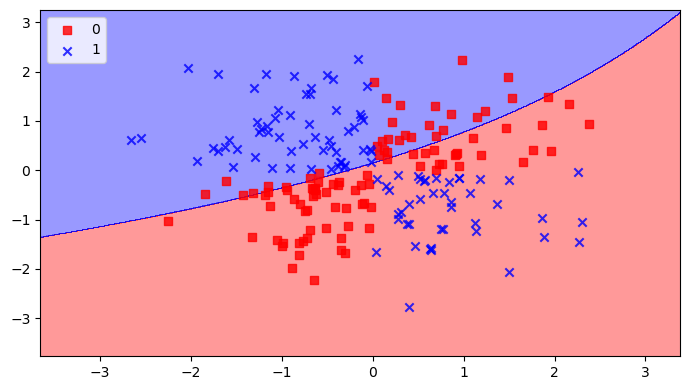

In [11]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', 
          random_state=0, 
          gamma=.01, 
          C=1)

# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plt.figure(figsize=(7, 4))

custom_decision_regions(X_xor, y_xor, classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()

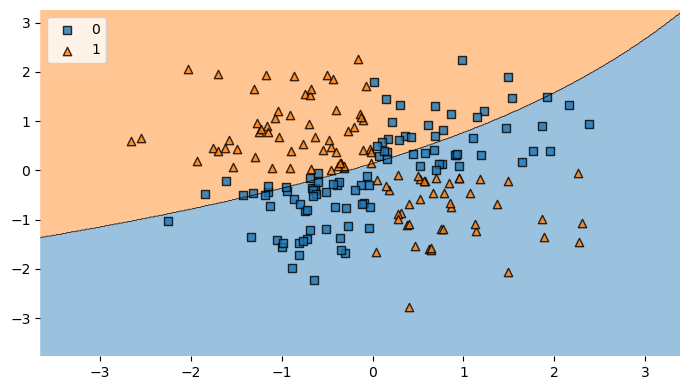

In [12]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', 
          random_state=0, 
          gamma=.01, 
          C=1)

# Train the classifier
svm.fit(X_xor, y_xor)

# Plotting decision regions
plt.figure(figsize=(7, 4))

plot_decision_regions(X_xor, y_xor, clf=svm)

# Adding axes annotations
plt.legend(loc='upper left')
plt.tight_layout()

#### Gamma = 0.5

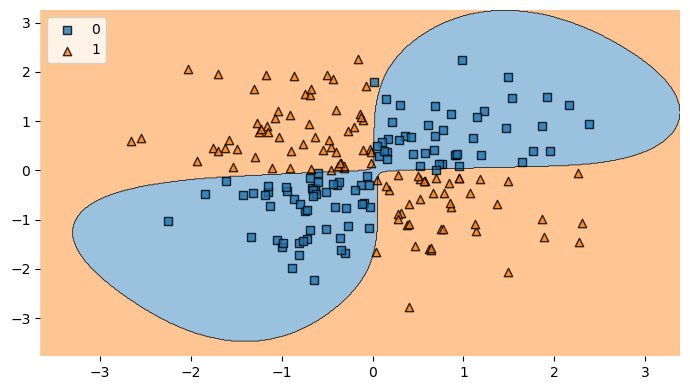

In [13]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', 
          random_state=0, 
          gamma=.5, 
          C=1)

# Train the classifier
svm.fit(X_xor, y_xor)

# Plotting decision regions
plt.figure(figsize=(7, 4))

plot_decision_regions(X_xor, y_xor, clf=svm)

# Adding axes annotations
plt.legend(loc='upper left')
plt.tight_layout()

#### Gamma = 1.0
You can see a big difference when we increase the gamma to 1. Now the decision boundary is starting to better cover the spread of the data.

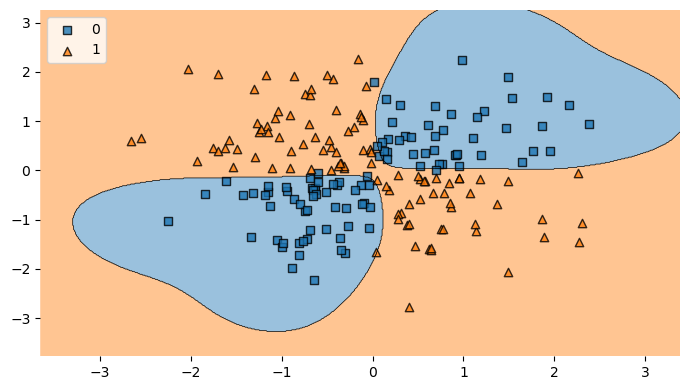

In [14]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', 
          random_state=0, 
          gamma=1, 
          C=1)

# Train the classifier
svm.fit(X_xor, y_xor)

# Plotting decision regions
plt.figure(figsize=(7, 4))

plot_decision_regions(X_xor, y_xor, clf=svm)

# Adding axes annotations
plt.legend(loc='upper left')
plt.tight_layout()

#### Gamma = 10.0
At gamma = 10 the spread of the kernel is less pronounced. 

The decision boundary starts to be highly effected by individual data points (i.e. variance).

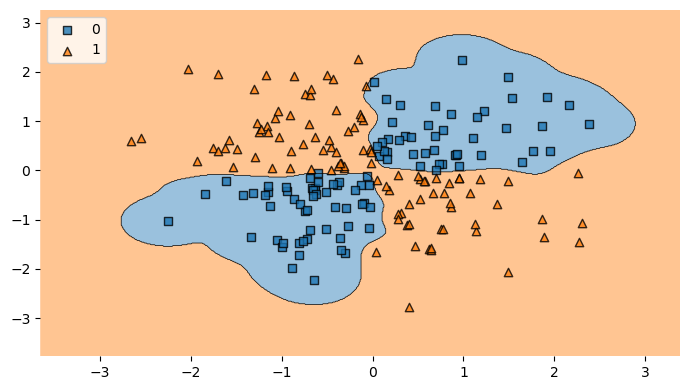

In [15]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', 
          random_state=0, 
          gamma=10, 
          C=1)

# Train the classifier
svm.fit(X_xor, y_xor)

# Plotting decision regions
plt.figure(figsize=(7, 4))

plot_decision_regions(X_xor, y_xor, clf=svm)

# Adding axes annotations
plt.legend(loc='upper left')
plt.tight_layout()

#### Gamma = 100.0
With high gamma, the decision boundary is almost entirely dependent on individual data points, creating “islands”. This data is clearly __overfitted__.

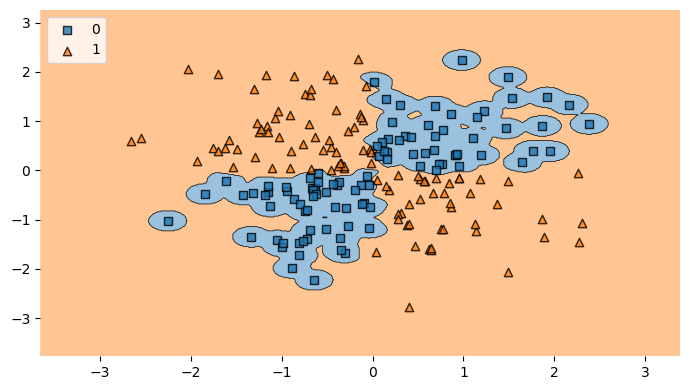

In [16]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', 
          random_state=0, 
          gamma=100, 
          C=1)

# Train the classifier
svm.fit(X_xor, y_xor)

# Plotting decision regions
plt.figure(figsize=(7, 4))

plot_decision_regions(X_xor, y_xor, clf=svm)

# Adding axes annotations
plt.legend(loc='upper left')
plt.tight_layout()

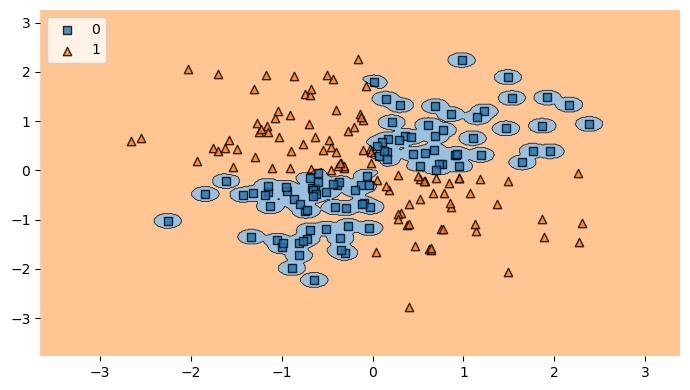

In [17]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', 
          random_state=0, 
          gamma=200, 
          C=1)

# Train the classifier
svm.fit(X_xor, y_xor)

# Plotting decision regions
plt.figure(figsize=(7, 4))

plot_decision_regions(X_xor, y_xor, clf=svm)

# Adding axes annotations
plt.legend(loc='upper left')
plt.tight_layout()

#### Summary on GAMMA

How far the influence of training samples reaches?

    If Gamma is LOW ... every point has far reach
    If Gamma is HIGH ... every point has close reach
    
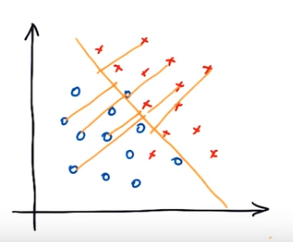

LOW VALUE OF GAMMA : Here the samples have effect on the decision boundary, even the far ones. Hence the decision boundary is more LINEAR

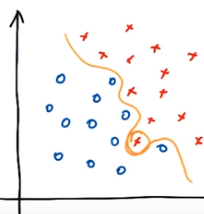

HIGH VALUE OF GAMMA : Here the near samples have effect on the decision boundary, not the far ones. Hence the decision boundary is more sort of __overfitting__

#### C - The Penalty Parameter

Now we will repeat the process for `C`: 
- Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

- we will use the same classifier, same data, and hold gamma constant. 

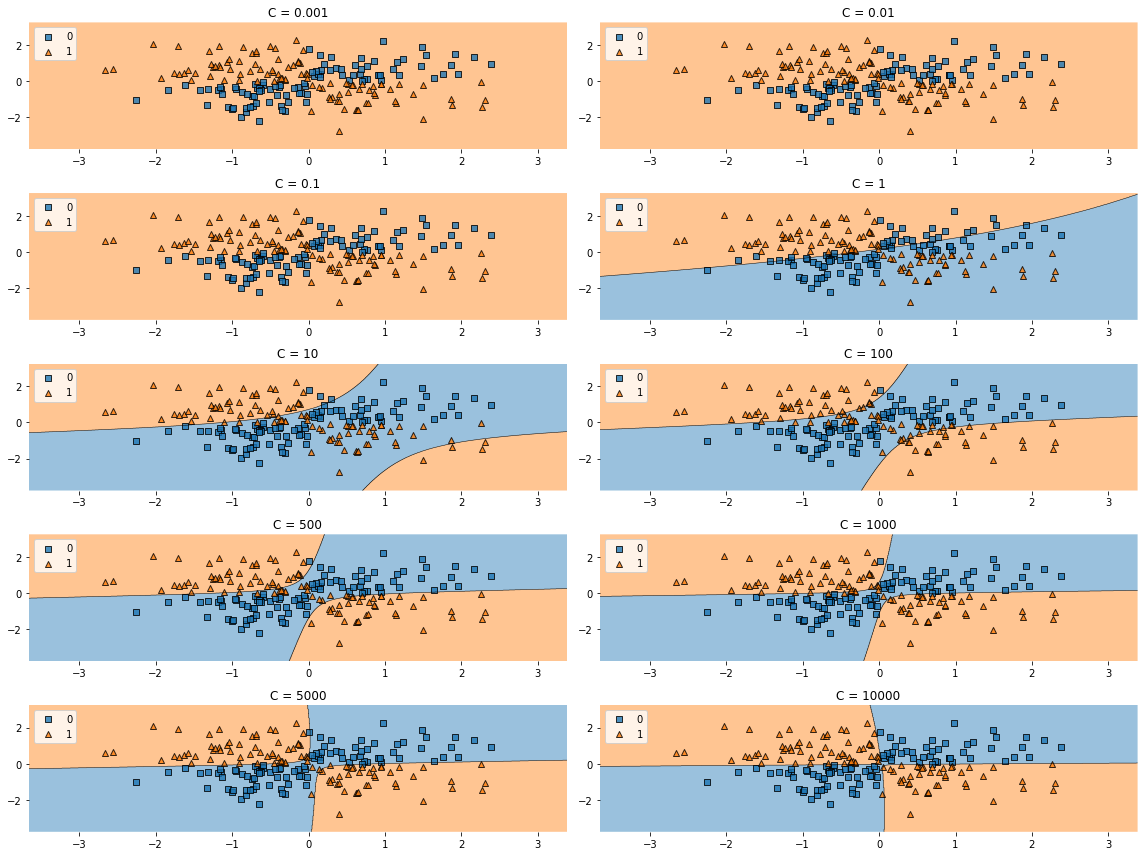

In [83]:
plt.figure(figsize=(16, 12))

C_param_range = [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 5000, 10000]

j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    svm = SVC(kernel='rbf', 
          random_state=0, 
          gamma=.01, 
          C=i)
    
    # Train the classifier
    svm.fit(X_xor, y_xor)

    j += 1
    
    # Printing decision regions      
    plt.subplot(5, 2, j)
    plt.subplots_adjust(hspace = 0.4)

    plot_decision_regions(X_xor, y_xor, clf=svm)
    #custom_decision_regions(X_xor, y_xor, classifier=svm)

    # Adding axes annotations
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.title('C = %s'%i)


#### C = .001

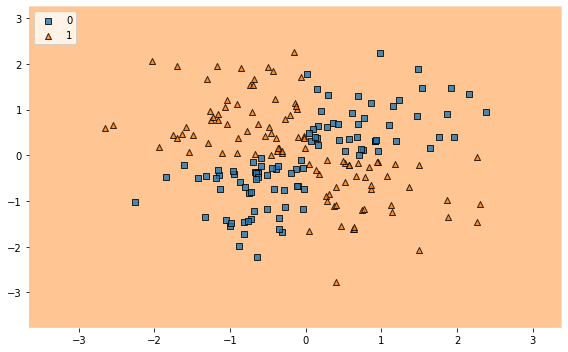

In [53]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', 
          random_state=0, 
          gamma=.01, 
          C=.001)

# Train the classifier
svm.fit(X_xor, y_xor)

# Plotting decision regions
plt.figure(figsize=(8, 5))

plot_decision_regions(X_xor, y_xor, clf=svm)

# Adding axes annotations
plt.legend(loc='upper left')
plt.tight_layout()

#### C = 1

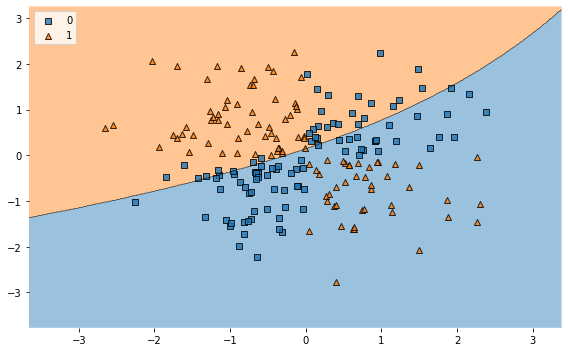

In [54]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', 
          random_state=0, 
          gamma=.01, 
          C=1)

# Train the classifier
svm.fit(X_xor, y_xor)

# Plotting decision regions
plt.figure(figsize=(8, 5))

plot_decision_regions(X_xor, y_xor, clf=svm)

# Adding axes annotations
plt.legend(loc='upper left')
plt.tight_layout()

#### C = 10

At C = 10, the classifier is less tolerant to misclassified data points and therefore the decision boundary is more severe.

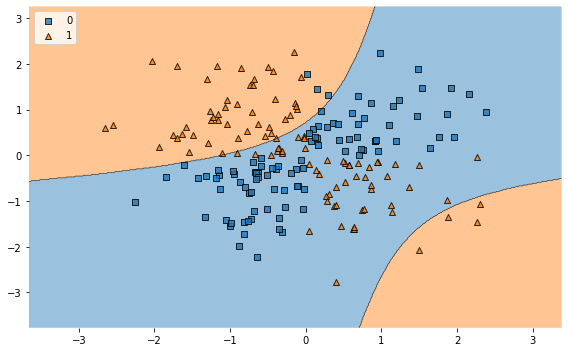

In [55]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', 
          random_state=0, 
          gamma=.01, 
          C=10)

# Train the classifier
svm.fit(X_xor, y_xor)

# Plotting decision regions
plt.figure(figsize=(8, 5))

plot_decision_regions(X_xor, y_xor, clf=svm)

# Adding axes annotations
plt.legend(loc='upper left')
plt.tight_layout()

#### C = 1000
When C = 1000, the classifier starts to become very intolerant to misclassified data points and thus the decision boundary becomes less biased and has more variance (i.e. more dependent on the individual data points).

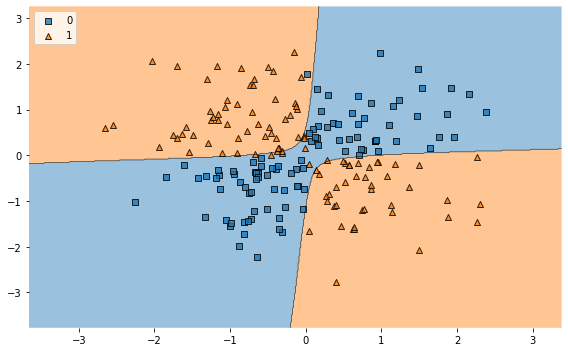

In [56]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', 
          random_state=0, 
          gamma=.01, 
          C=1000)

# Train the classifier
svm.fit(X_xor, y_xor)

# Plotting decision regions
plt.figure(figsize=(8, 5))

plot_decision_regions(X_xor, y_xor, clf=svm)

# Adding axes annotations
plt.legend(loc='upper left')
plt.tight_layout()

#### C = 10000
At C = 10000, the classifier “works really hard” to not misclassify data points and we see signs of overfitting.

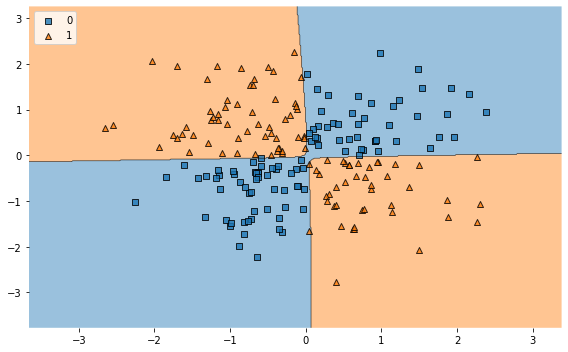

In [57]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', 
          random_state=0, 
          gamma=.01, 
          C=10000)

# Train the classifier
svm.fit(X_xor, y_xor)

# Plotting decision regions
plt.figure(figsize=(8, 5))

plot_decision_regions(X_xor, y_xor, clf=svm)

# Adding axes annotations
plt.legend(loc='upper left')
plt.tight_layout()

#### C = 100000
At C = 100000, the classifier is heavily penalized for any misclassified data points and therefore the margins are small.

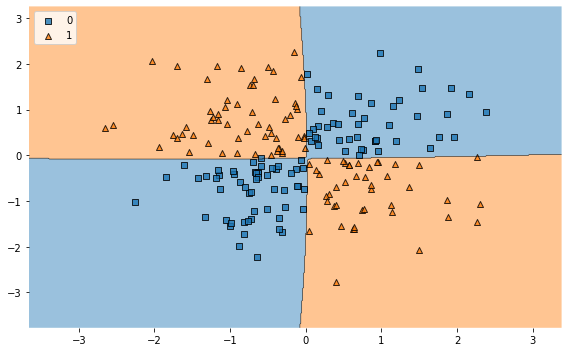

In [58]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', 
          random_state=0, 
          gamma=.01, 
          C=100000)

# Train the classifier
svm.fit(X_xor, y_xor)

# Plotting decision regions
plt.figure(figsize=(8, 5))

plot_decision_regions(X_xor, y_xor, clf=svm)

# Adding axes annotations
plt.legend(loc='upper left')
plt.tight_layout()